If one subsets a domain, the number of gridpoints in that subset varies based on the grid location. This package addresses this problem.

In [1]:
import numpy as np
import pymom6.pymom6 as pym6

### Loading datasets and variables
The following methods are equivalent:

In [5]:
file_ = '../pymom6/tests/data/output__0001_11_019.nc'
geometry_ = pym6.GridGeometry('../pymom6/tests/data/ocean_geometry.nc')

In [6]:
with pym6.Dataset(file_,west_lon=-10,east_lon=-5,south_lat=35,north_lat=37) as ds:
    u = ds.u.read().compute()
    v = ds.v.read().compute()

In [7]:
u

MOM6Variable: u['Time', 'zl', 'yh', 'xq']
Dimensions:
Time 4
zl 10
yh 4
xq 11
Array: [ 0.07564398  0.0755064   0.06949233  0.05577079]...
       [-0.00596137 -0.0081569  -0.01161808 -0.01469373]
Shape: (4, 10, 4, 11)
Max, Min: 0.16089875996112823, -0.050021279603242874

In [8]:
v

MOM6Variable: v['Time', 'zl', 'yq', 'xh']
Dimensions:
Time 4
zl 10
yq 4
xh 11
Array: [ 0.01171383  0.02409703  0.03616175  0.04600308]...
       [-0.02379222 -0.02028444 -0.01834748 -0.01857461]
Shape: (4, 10, 4, 11)
Max, Min: 0.0693076103925705, -0.02881382778286934

In [9]:
with pym6.Dataset(file_) as ds:
    u = ds.u.sel(x=slice(-10,-5),y=slice(35,37)).read().compute()
    v = ds.v.sel(x=slice(-10,-5),y=slice(35,37)).read().compute()

In [10]:
u

MOM6Variable: u['Time', 'zl', 'yh', 'xq']
Dimensions:
Time 4
zl 10
yh 4
xq 11
Array: [ 0.07564398  0.0755064   0.06949233  0.05577079]...
       [-0.00596137 -0.0081569  -0.01161808 -0.01469373]
Shape: (4, 10, 4, 11)
Max, Min: 0.16089875996112823, -0.050021279603242874

In [11]:
v

MOM6Variable: v['Time', 'zl', 'yq', 'xh']
Dimensions:
Time 4
zl 10
yq 4
xh 11
Array: [ 0.01171383  0.02409703  0.03616175  0.04600308]...
       [-0.02379222 -0.02028444 -0.01834748 -0.01857461]
Shape: (4, 10, 4, 11)
Max, Min: 0.0693076103925705, -0.02881382778286934

### Moving from one grid location to another

In [15]:
with pym6.Dataset(file_) as ds:
    uatq = ds.u.final_loc('ql').yep().sel(x=slice(-10,-5),y=slice(35,37)).read().move_to('q').compute()
    vatq = ds.v.final_loc('ql').xep().sel(x=slice(-10,-5),y=slice(35,37)).read().move_to('q').compute()
    uath = ds.u.final_loc('hl').xsm().sel(x=slice(-10,-5),y=slice(35,37)).read().move_to('h').compute()
    vath = ds.v.final_loc('hl').ysm().sel(x=slice(-10,-5),y=slice(35,37)).read().move_to('h').compute()

This will be further clarified in the plotting section.

### Plotting
Plotting is handled by xarray. So use the `to_DataArray` method before plotting.

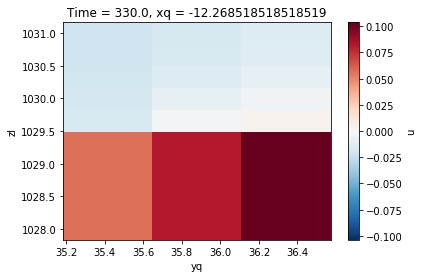

In [16]:
uatq.nanmean((0,3)).to_DataArray().plot()

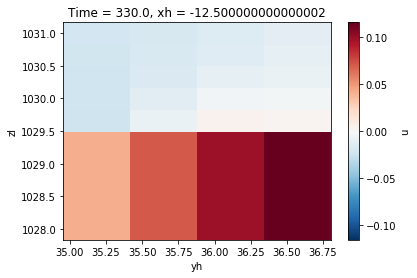

In [17]:
uath.nanmean((0,3)).to_DataArray().plot()

Notice that the `x-axis` labels in the above two figures are different. This is because as `uath` and `uatq` are at `h` and `q` points, respectively. Similarly, for `vatq` and `vath` below.

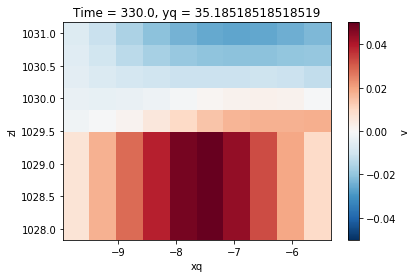

In [18]:
vatq.nanmean((0,2)).to_DataArray().plot()

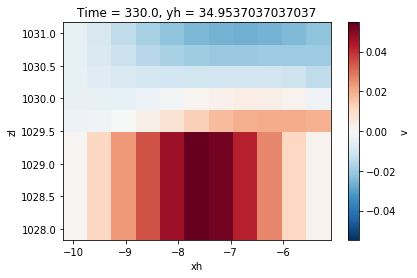

In [19]:
vath.nanmean((0,2)).to_DataArray().plot()

### Changing to z-coordinate from density coordinate

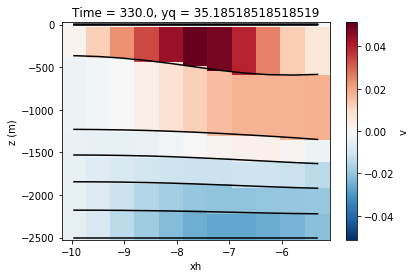

In [21]:
z = np.linspace(-2500,0)
with pym6.Dataset(file_) as ds:
    v = ds.v.sel(x=slice(-10,-5),y=slice(35,37)).read().nanmean((0,2)).compute()
    e = ds.e.final_loc('vi').sel(x=slice(-10,-5),y=slice(35,37)).yep().read().move_to('v').nanmean((0,2)).compute()
    im = v.toz(z,e).to_DataArray().plot()
    im.axes.plot(e.dimensions['xh'],e.values.squeeze().T,'k')

### Differentiation

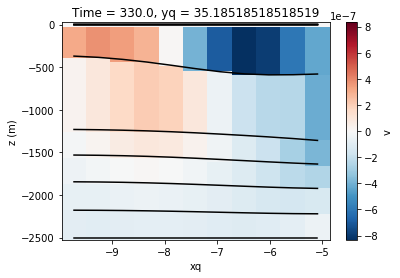

In [7]:
z = np.linspace(-2500,0)
with pym6.Dataset(file_,geometry=geometry_) as ds:
    vx = ds.v.final_loc('ql').sel(x=slice(-10,-5),y=slice(35,37)).xep().read().dbyd(3).nanmean((0,2)).compute()
    uy = ds.u.final_loc('ql').sel(x=slice(-10,-5),y=slice(35,37)).yep().read().dbyd(2).nanmean((0,2)).compute()
    vort = (vx-uy).compute()
    e = ds.e.final_loc('qi').sel(x=slice(-10,-5),y=slice(35,37)).xep().yep().read().move_to('v').move_to('q').nanmean((0,2)).compute()
    im = vort.toz(z,e).to_DataArray().plot()
    im.axes.plot(e.dimensions['xq'],e.values.squeeze().T,'k')

The above figure shows the vorticity. Notice how `v_x` and `u_y` were obtained at `q` point after differentiation.